In [1]:
# Please visit:
#
# https://download.nkg-mn.com/credo/anomalies/
#
# Pretrained dots_v2.h5 and others can be downloaded from mentioned website.

In [2]:
from commons import *
from dataset_loader import load_from_file
from IPython.display import display
import matplotlib.pyplot as plt
import cv2

DOTS_DST = 'cache/dots_v3.pickle'
TRACKS_DST = 'cache/tracks_v3.pickle'
WORMS_DST = 'cache/worms_v3.pickle'
ARTIFACTS_DST = 'cache/artifacts_v3.pickle'

DOTS_AC = 'cache/dots_v3_kl.h5'
TRACKS_AC = 'cache/tracks_v3_kl.h5'
WORMS_AC = 'cache/worms_v3_kl.h5'
ARTIFACTS_AC = 'cache/artifacts_v3_kl.h5'


def train_and_test(train_set, validation_set, fn):

    autoencoder = original_autoencoder(64, kl=True)
    autoencoder = train_or_cache(train_set, autoencoder, fn, validation_set=validation_set, force_train=True, kl=True)

    # test załadowania autoenkodera po zapisaniu
    from keras.models import load_model
    load_model(fn, custom_objects={'kl_divergence': tf.keras.losses.KLDivergence})

    for df_func, df_name in zip(
            [dm_func_mean],
            ['mean']
    ):
        for img_set, set_names in zip([validation_set], ['train']):
            decoded = autoencoder.predict(img_set)

            vis, errors = visualize_predictions(decoded, img_set, df_func, False, 16)
            img_path = fn.replace('.h5', '-vis.png')
            hist_path = fn.replace('.h5', '-hist.png')
            cv2.imwrite(img_path, vis)
            display(Image.open(img_path))
            if len(img_set) > 256:
                vis, errors = visualize_predictions(decoded, img_set, df_func, False)
                img_path = fn.replace('.h5', '-vis_full.png')
                cv2.imwrite(img_path, vis)

            plt.figure(figsize=(8,6))
            plt.hist(errors, bins=100, alpha=0.5, label=set_names)
            plt.xlabel("Data", size=14)
            plt.ylabel("Count", size=14)
            plt.title(df_name)
            plt.legend(loc='upper right')
            plt.savefig(hist_path)


def load_and_train(src, out):
    images, augmented = load_from_file(src)
    train_and_test(np.expand_dims(augmented, axis=-1), np.expand_dims(images, axis=-1), out)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/200
1290/1290 [==============================] - 19s 13ms/step - loss: 0.0200 - kullback_leibler_divergence: 0.0076 - val_loss: 4.5176e-04 - val_kullback_leibler_divergence: 0.0065
Epoch 2/200
1290/1290 [==============================] - 18s 14ms/step - loss: 2.2447e-04 - kullback_leibler_divergence: 0.0037 - val_loss: 9.2130e-05 - val_kullback_leibler_divergence: 0.0015
Epoch 3/200
1290/1290 [==============================] - 18s 14ms/step - loss: 6.9899e-05 - kullback_leibler_divergence: 4.6951e-04 - val_loss: 5.1879e-05 - val_kullback_leibler_divergence: 9.5491e-04
Epoch 4/200
1290/1290 [==============================] - 17s 13ms/step - loss: 6.6476e-05 - kullback_leibler_divergence: 4.3364e-04 - val_loss: 5.1727e-05 - val_kullback_leibler_divergence: 9.6876e-04
Epoch 5/200
1290/1290 [==============================] - 17s 13ms/step - loss: 4.4365e-05 - kullback_leibler_divergence: 3.1069e-04 - val_loss: 5.90

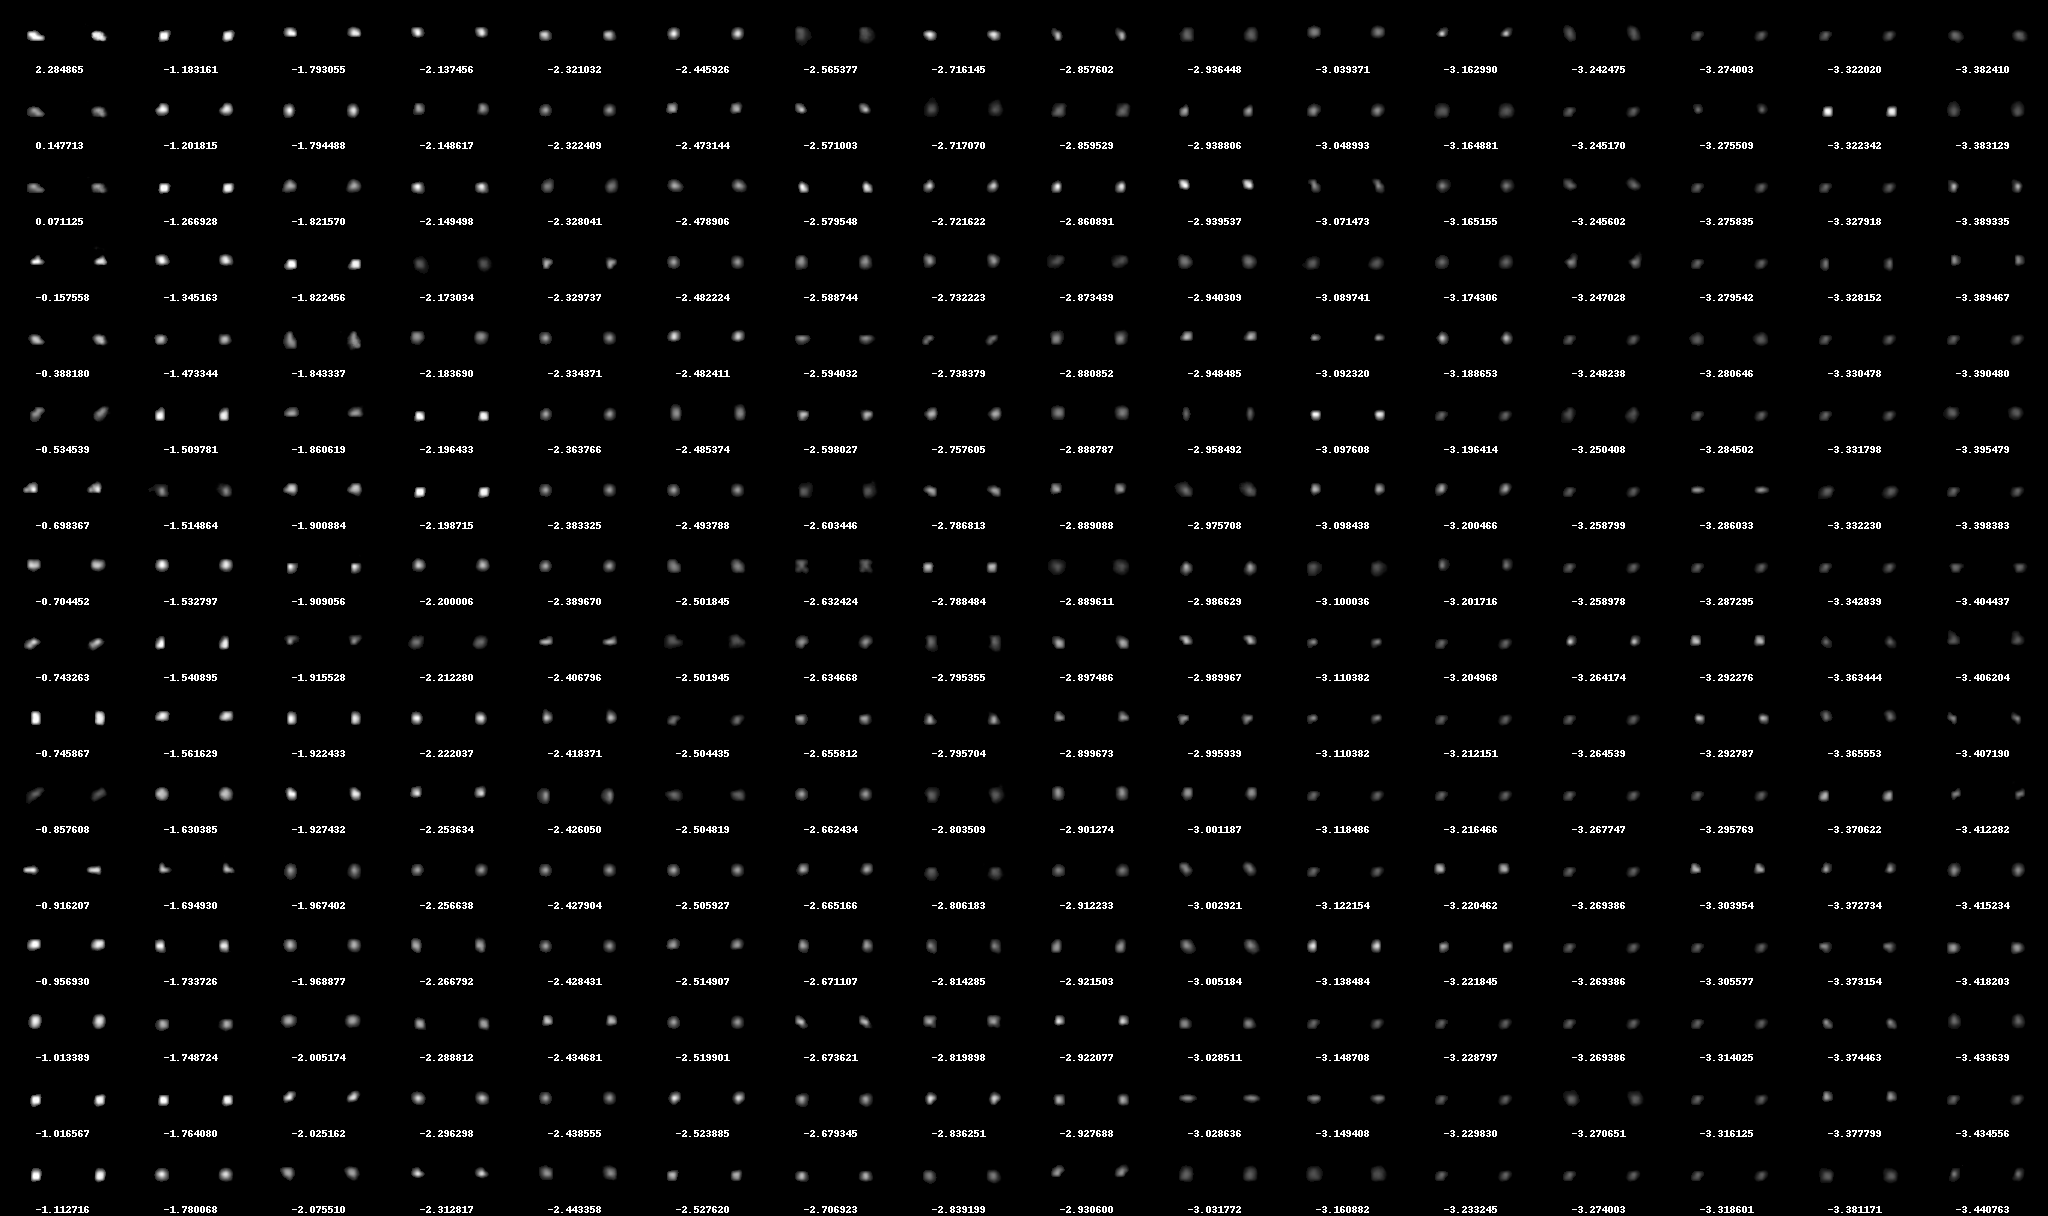

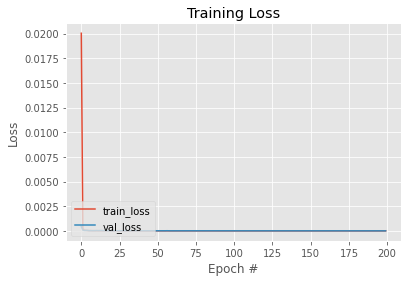

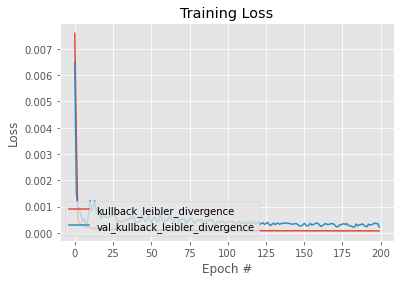

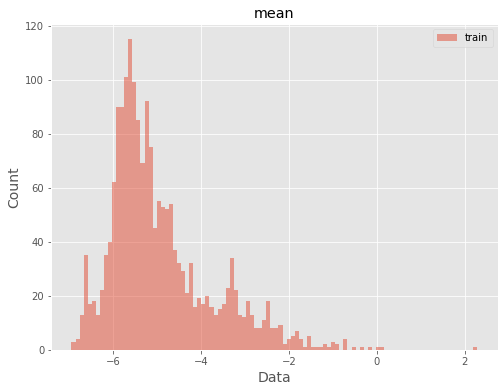

In [3]:
load_and_train(DOTS_DST, DOTS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/200
2108/2108 [==============================] - 27s 13ms/step - loss: 0.0127 - kullback_leibler_divergence: 0.0109 - val_loss: 8.6422e-04 - val_kullback_leibler_divergence: 0.0073
Epoch 2/200
2108/2108 [==============================] - 27s 13ms/step - loss: 6.6460e-04 - kullback_leibler_divergence: 0.0037 - val_loss: 6.5684e-04 - val_kullback_leibler_divergence: 0.0054
Epoch 3/200
2108/2108 [==============================] - 26s 13ms/step - loss: 5.6343e-04 - kullback_leibler_divergence: 0.0032 - val_loss: 5.8632e-04 - val_kullback_leibler_divergence: 0.0050
Epoch 4/200
2108/2108 [==============================] - 27s 13ms/step - loss: 5.3018e-04 - kullback_leibler_divergence: 0.0030 - val_loss: 5.1667e-04 - val_kullback_leibler_divergence: 0.0033
Epoch 5/200
2108/2108 [==============================] - 26s 13ms/step - loss: 4.9461e-04 - kullback_leibler_divergence: 0.0028 - val_loss: 4.9857e-04 - val_kullbac

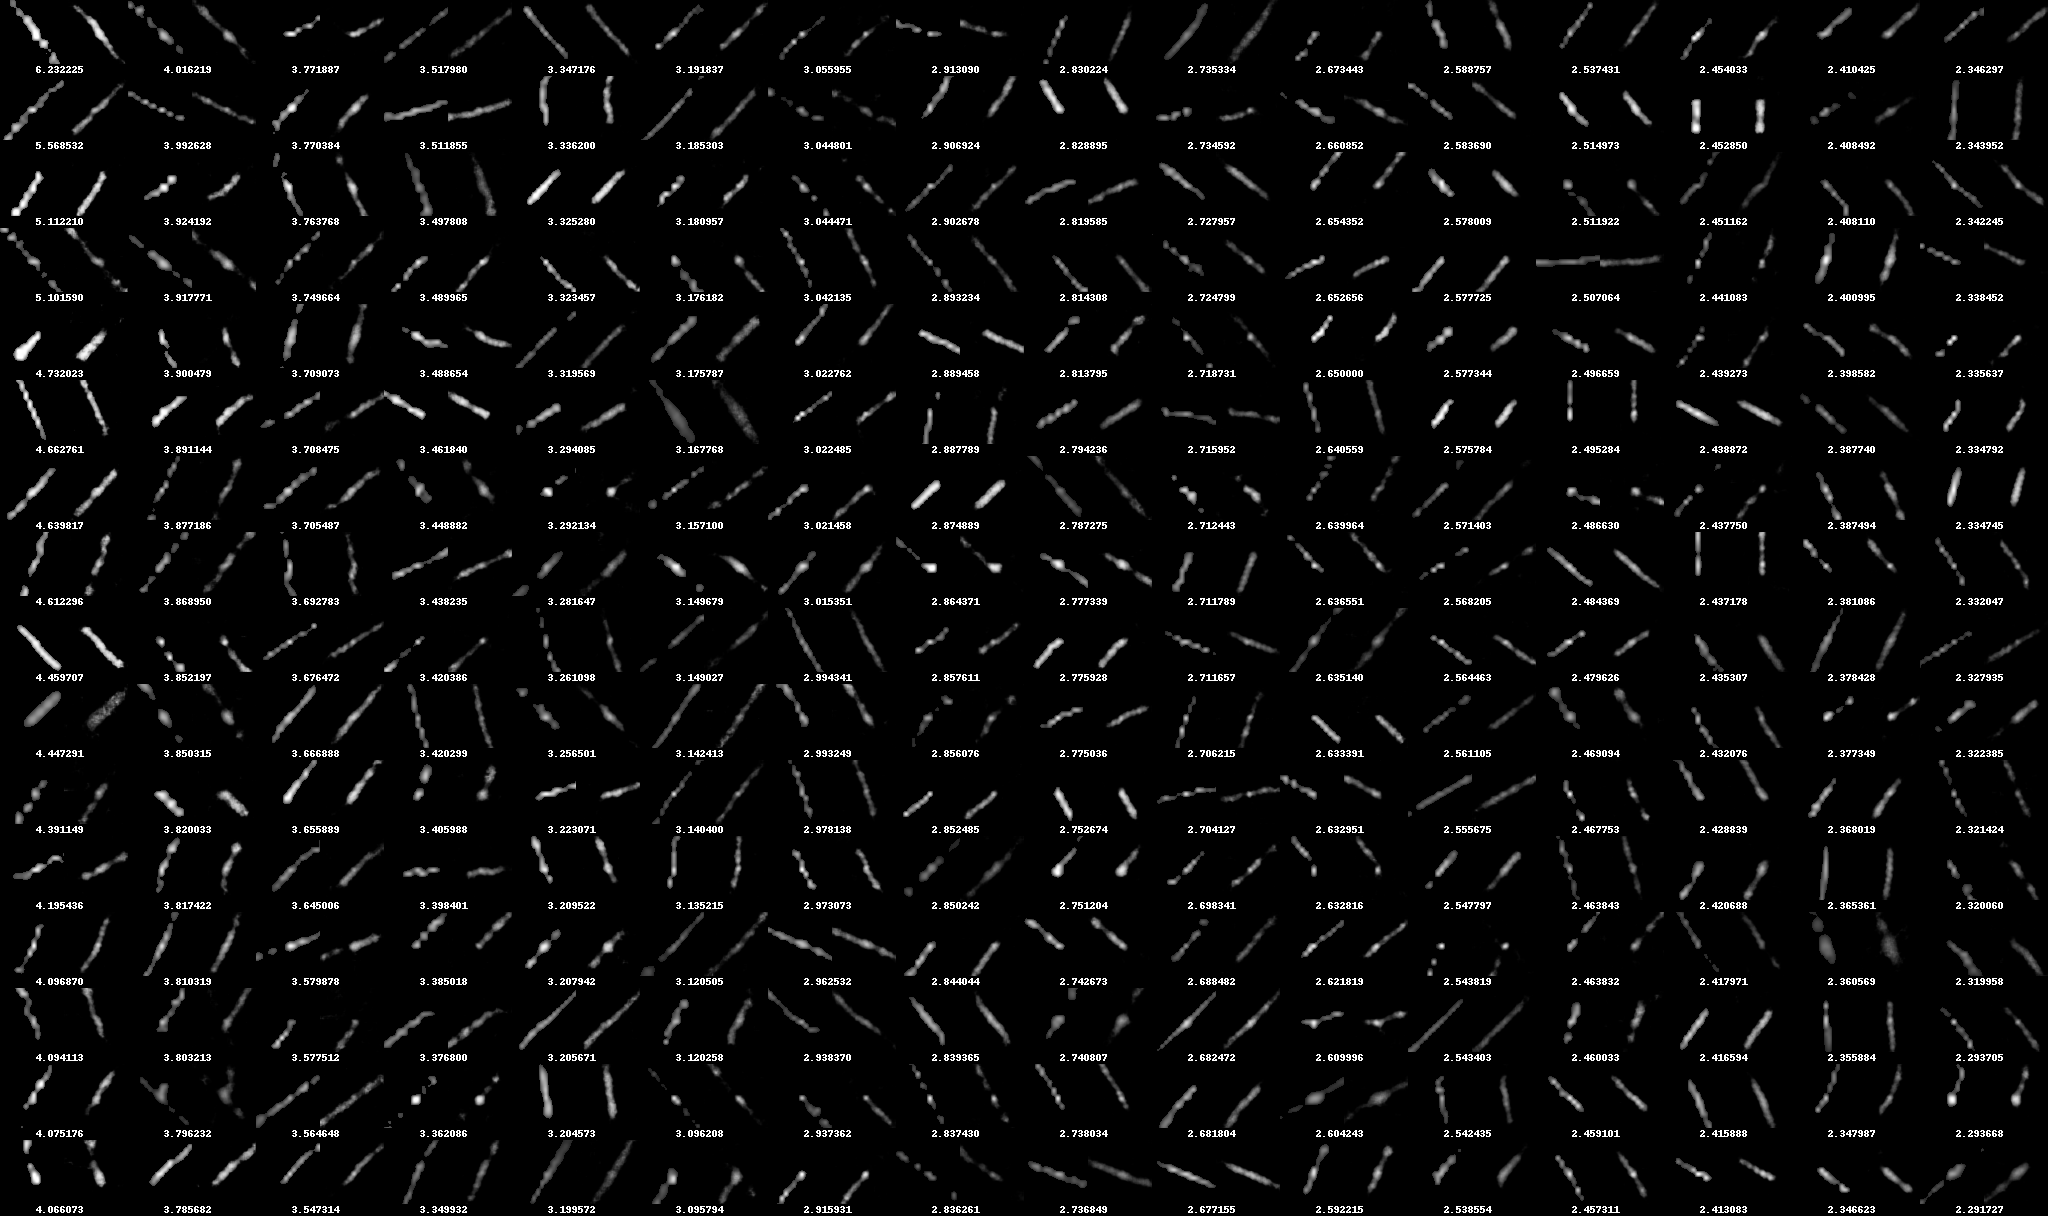

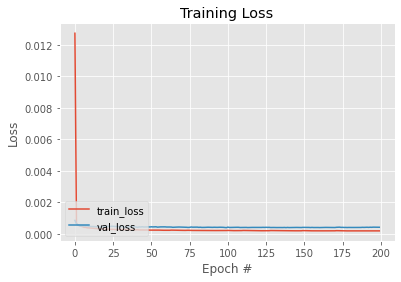

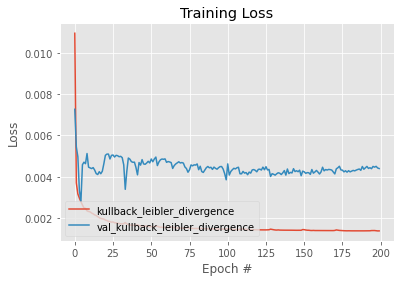

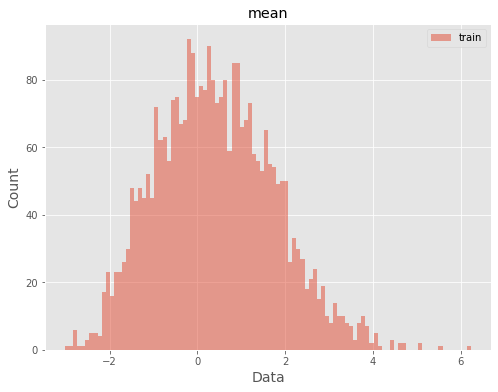

In [4]:
load_and_train(TRACKS_DST, TRACKS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/200
341/341 [==============================] - 5s 12ms/step - loss: 0.0396 - kullback_leibler_divergence: 0.0216 - val_loss: 0.0225 - val_kullback_leibler_divergence: 0.0454
Epoch 2/200
341/341 [==============================] - 4s 12ms/step - loss: 0.0176 - kullback_leibler_divergence: 0.0172 - val_loss: 0.0137 - val_kullback_leibler_divergence: 0.0300
Epoch 3/200
341/341 [==============================] - 4s 12ms/step - loss: 0.0151 - kullback_leibler_divergence: 0.0118 - val_loss: 0.0113 - val_kullback_leibler_divergence: 0.0111
Epoch 4/200
341/341 [==============================] - 4s 11ms/step - loss: 0.0131 - kullback_leibler_divergence: 0.0129 - val_loss: 0.0098 - val_kullback_leibler_divergence: 0.0133
Epoch 5/200
341/341 [==============================] - 4s 12ms/step - loss: 0.0124 - kullback_leibler_divergence: 0.0104 - val_loss: 0.0094 - val_kullback_leibler_divergence: 0.0148
Epoch 6/200
341/341 [=

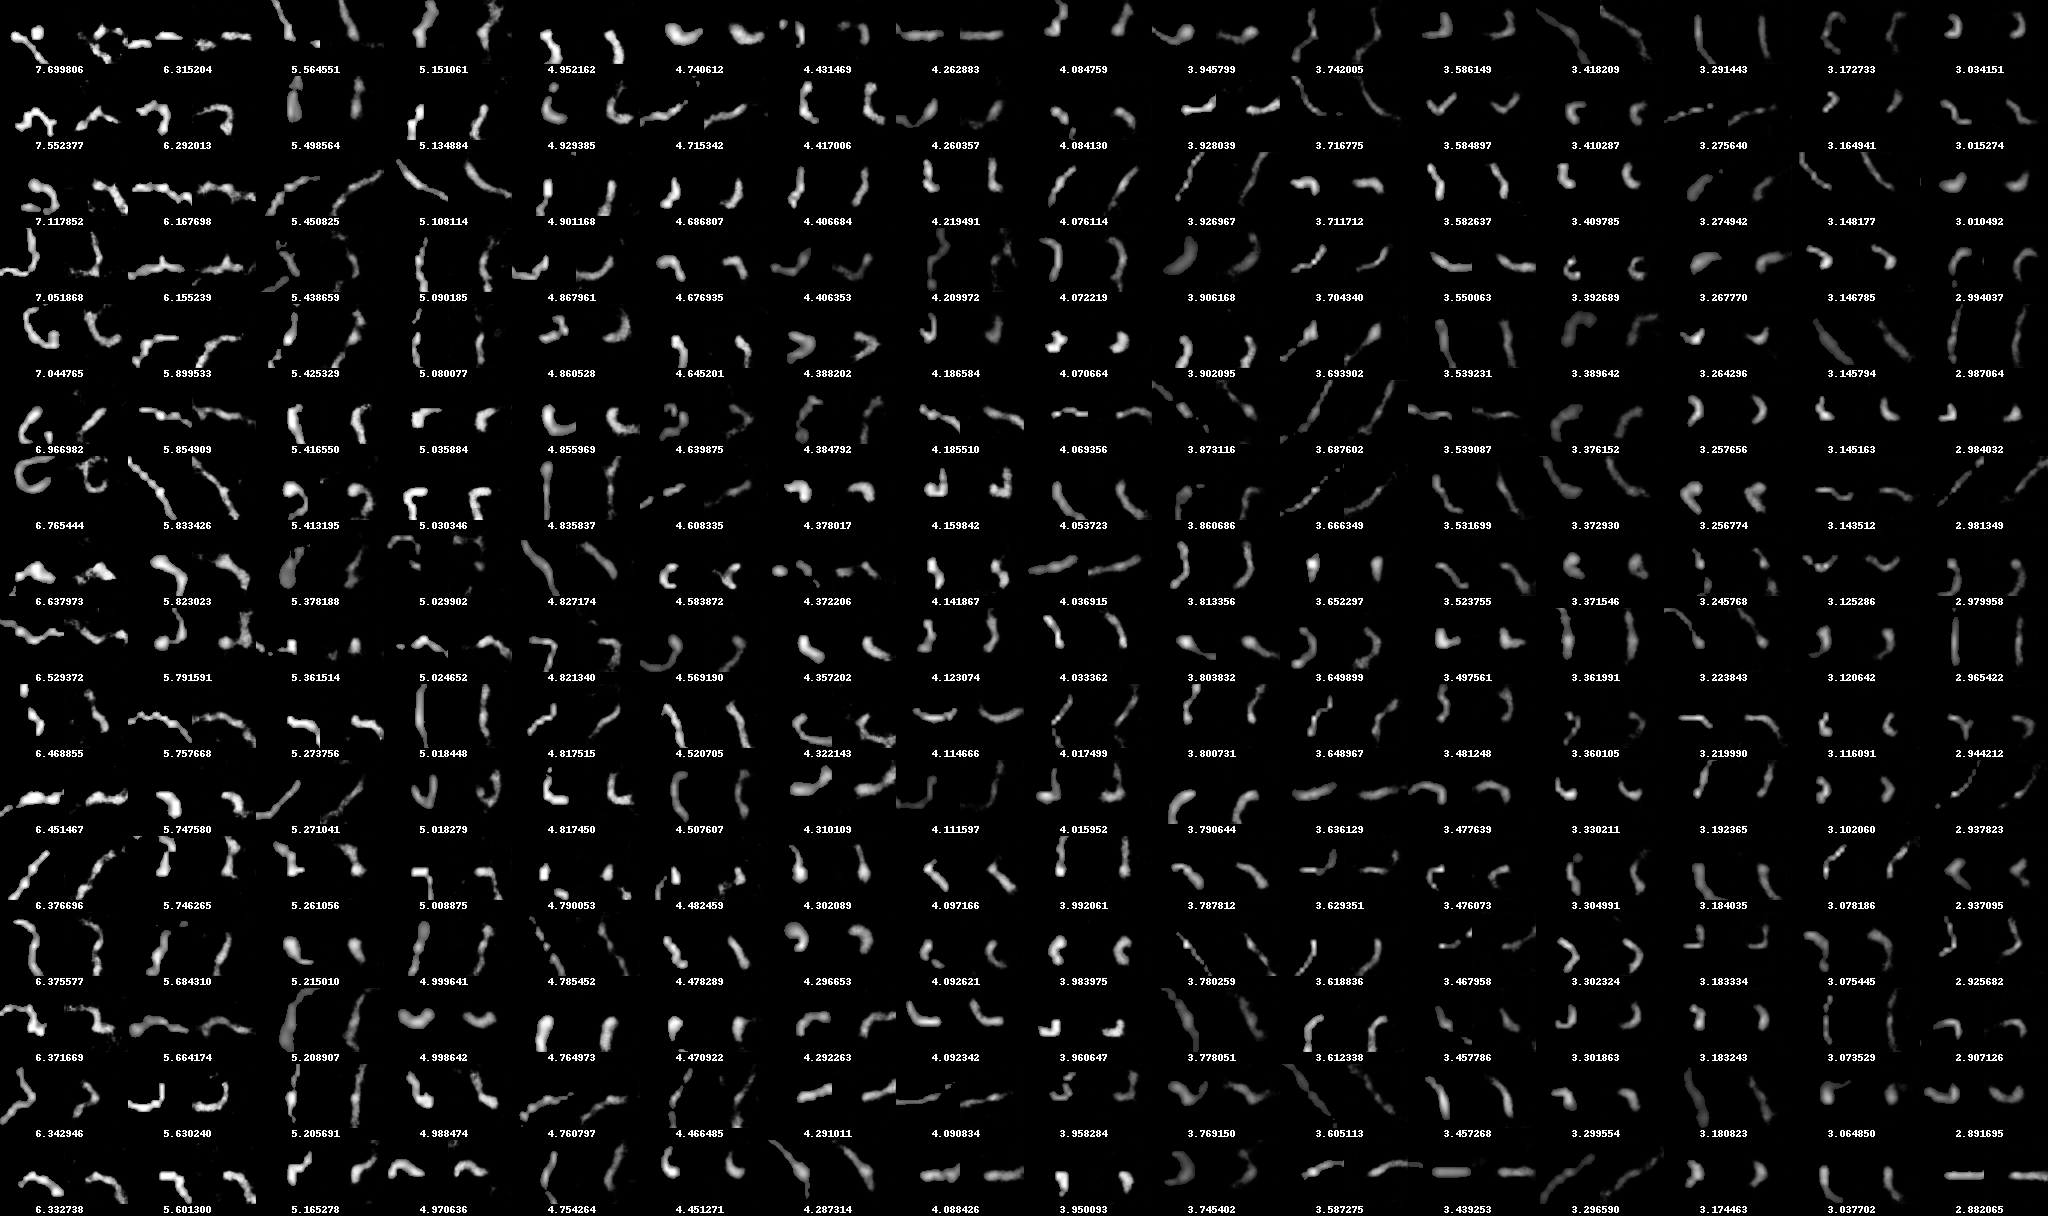

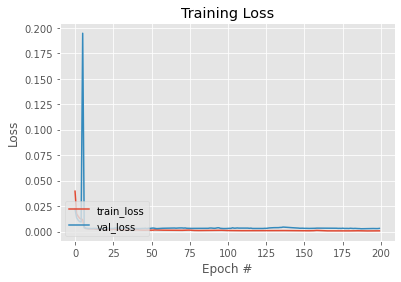

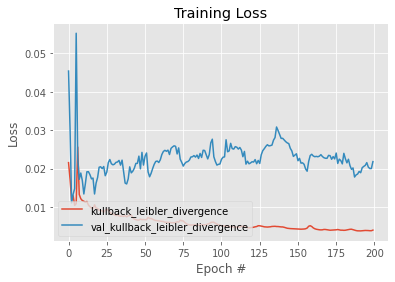

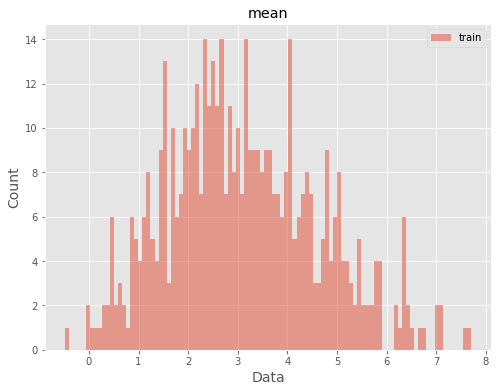

In [5]:
load_and_train(WORMS_DST, WORMS_AC)

320
0
128
18496
0
256
0
262160
278528
0
36928
0
256
18464
0
128
289
Epoch 1/200
445/445 [==============================] - 6s 13ms/step - loss: 0.0291 - kullback_leibler_divergence: 0.0403 - val_loss: 0.0071 - val_kullback_leibler_divergence: 0.0470
Epoch 2/200
445/445 [==============================] - 6s 13ms/step - loss: 0.0063 - kullback_leibler_divergence: 0.0320 - val_loss: 0.0052 - val_kullback_leibler_divergence: 0.0311
Epoch 3/200
445/445 [==============================] - 6s 12ms/step - loss: 0.0038 - kullback_leibler_divergence: 0.0177 - val_loss: 0.0026 - val_kullback_leibler_divergence: 0.0168
Epoch 4/200
445/445 [==============================] - 6s 13ms/step - loss: 0.0038 - kullback_leibler_divergence: 0.0206 - val_loss: 0.0025 - val_kullback_leibler_divergence: 0.0132
Epoch 5/200
445/445 [==============================] - 6s 12ms/step - loss: 0.0026 - kullback_leibler_divergence: 0.0126 - val_loss: 0.0022 - val_kullback_leibler_divergence: 0.0106
Epoch 6/200
445/445 [=

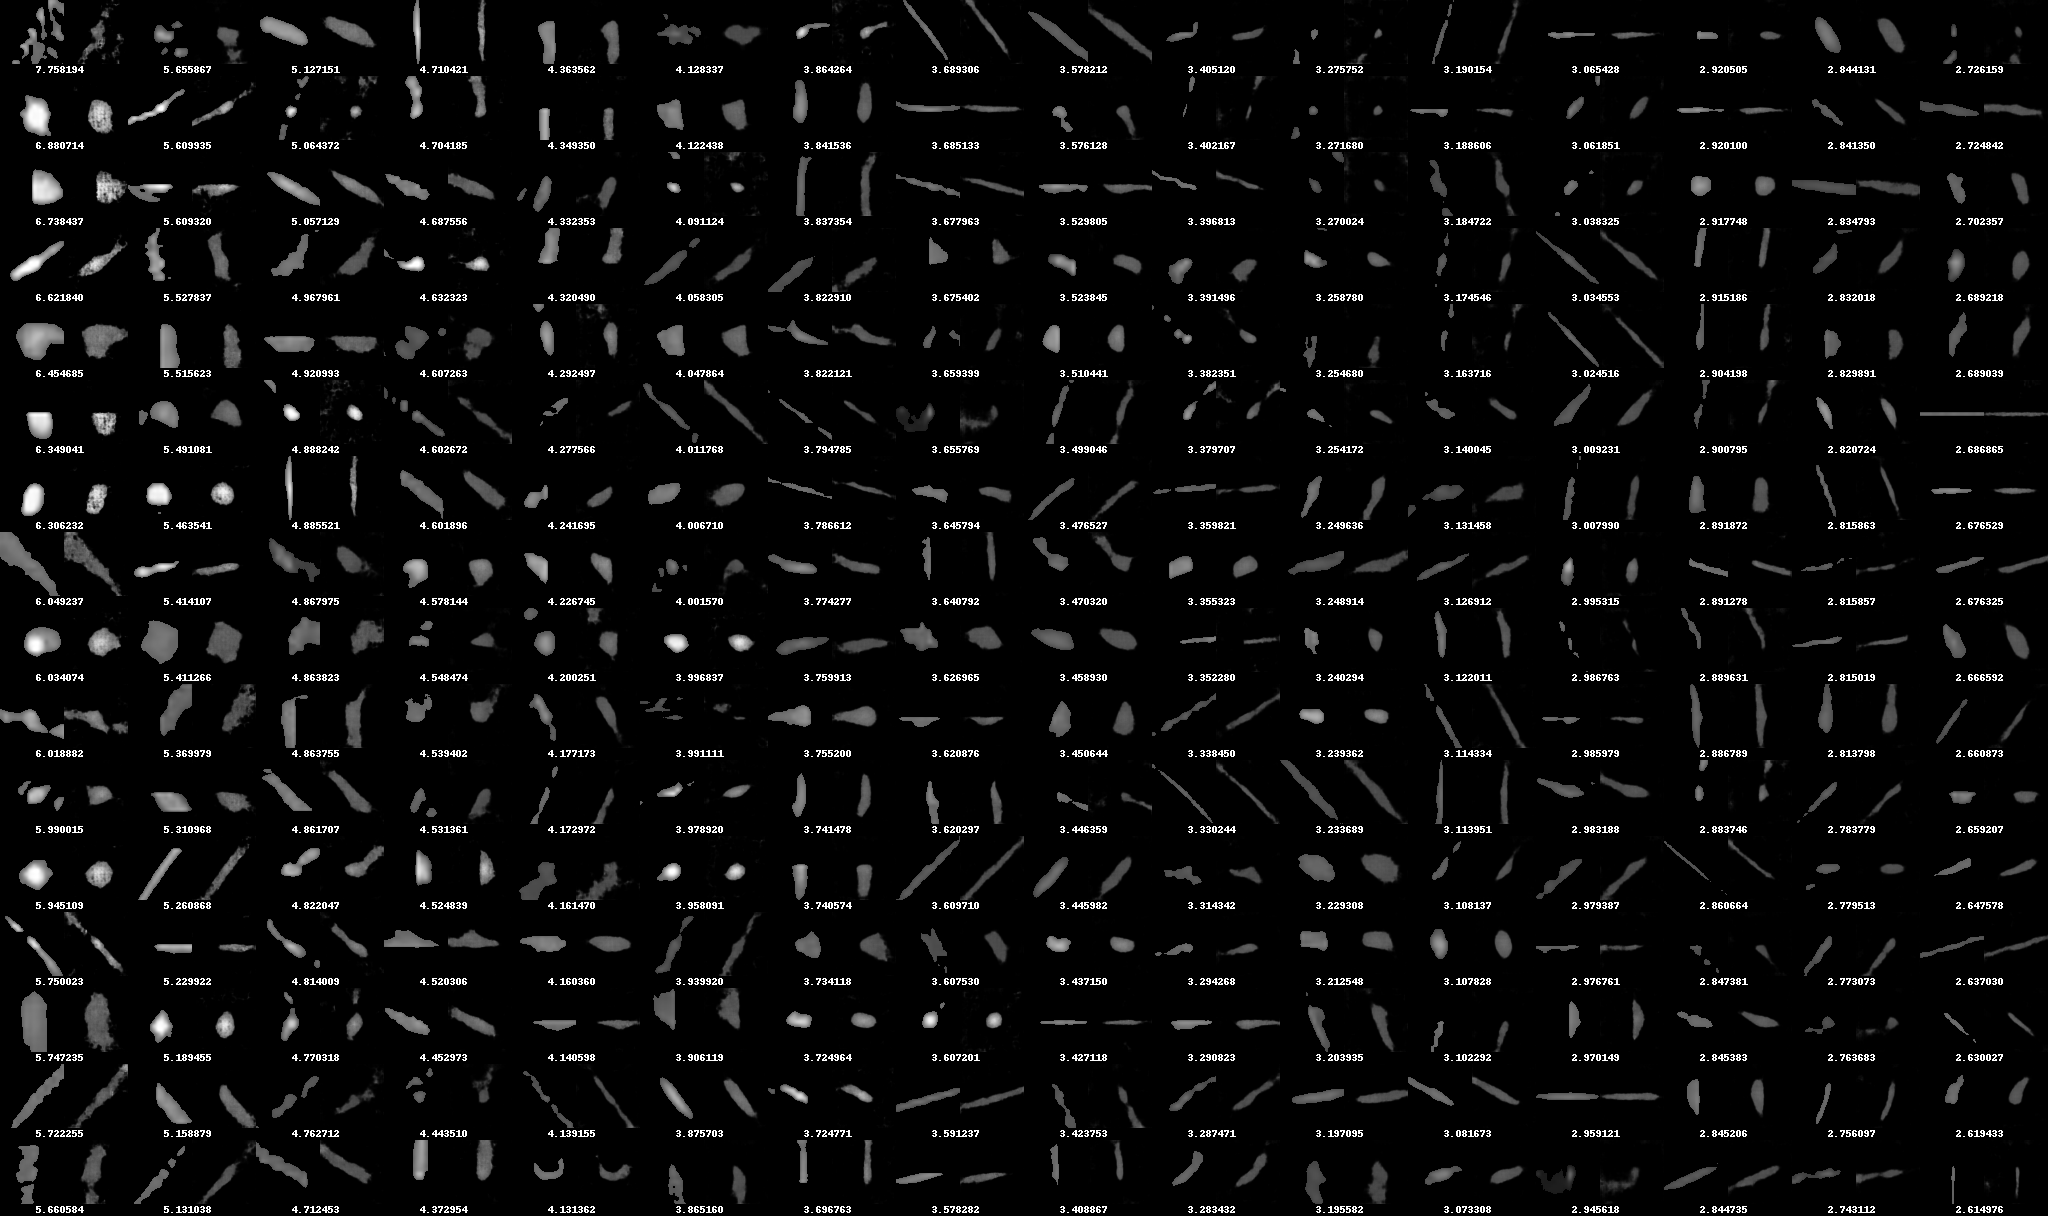

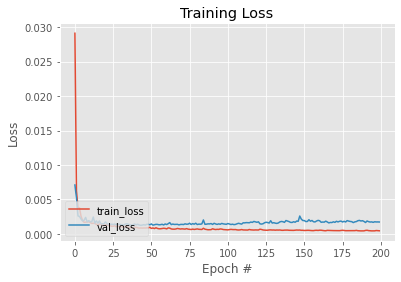

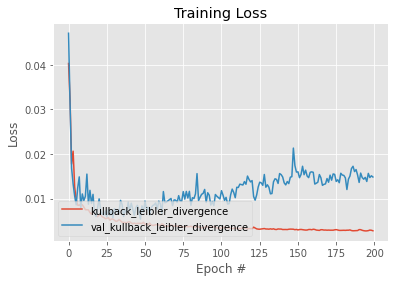

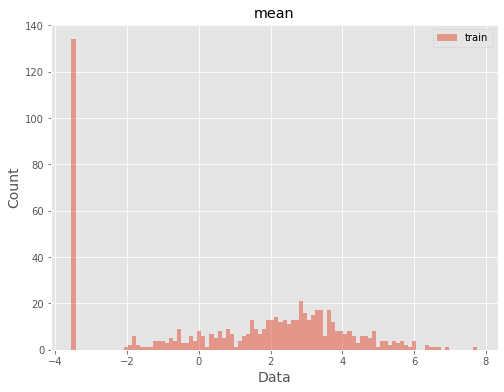

In [6]:
load_and_train(ARTIFACTS_DST, ARTIFACTS_AC)